# Microscopist's Python and matplotlib conventions

### Eugen Kozyrau, July 2023

### This notebook aims to explore and explain some conventions that python, matplotlib and nionswift use.<br><br> Some of them can be quite annoying to a microscopist starting out with *manual* data analysis.<br><br> It was written in jupyter lab using the `shift+R` "outputs next to cells" view.

In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (8.0, 4.0)}
import numpy as np
import matplotlib.pyplot as plt

Recently I have been having troubles, using microscopy data as input for a function I wrote.<br><br> So I decided to explore the fundamentals of what I'm working with.<br><br>Starting with numpy Arrays.

In [2]:
test_array = np.array(([1,2,3],[4,5,6],[7,8,9]))
print(test_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
print("array at [1,0] = ",test_array[1,0])
print("array at [0,1] = ",test_array[0,1])

array at [1,0] =  4
array at [0,1] =  2


We can see that matplotlib indexes rows in the first index, and columns in the second index.


Effectively a $[y,x]$ indexation

This however, is counter-intuitive to the way a conventional x-y graph would look like.

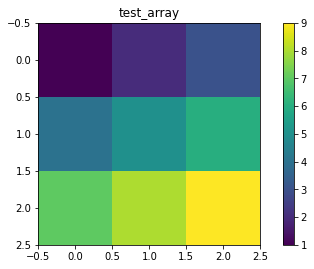

In [4]:
plt.figure()
plt.title("test_array")
plt.imshow(test_array)
plt.colorbar()
plt.show()

matplotlib seems to have adapted to this convention of indexing, displaying an intuitive representation of the array

However, the origin is in the **upper left corner** by default.

we also notice that unlike nionswift, the datapoints are located at the **centers of the pixels**, whereas nionswift puts them at the **upper left** corners

If you were to use the common "lower" origin notation:

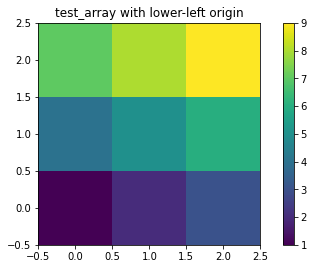

In [5]:
plt.figure()
plt.title("test_array with lower-left origin")
plt.imshow(test_array, origin="lower")
plt.colorbar()
plt.show()

Your image or data now looks like it's mirrored in y, but rows (y) still correspond to the first index and columns (x) to the second.
<br> The graph is now **also** mirrored in respect to the array.<br><br>
At least now we know how to plot data-images using conventional coordinate axes.

What about python lists? Do they use the strange $[y,x]$ indexing scheme?<br>
(I'll be using lists `[]` here, as tuples `()` are **immutable**, thus more difficult to manipulate)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
tuple at [1][0] =  4
tuple at [0][1] =  2


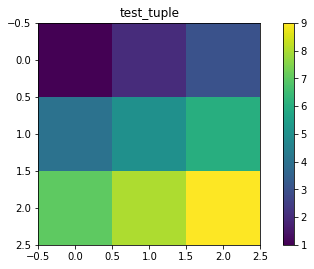

In [6]:
test_tuple = [[1,2,3],[4,5,6],[7,8,9]]
print(test_tuple)

print("tuple at [1][0] = ",test_tuple[1][0])
print("tuple at [0][1] = ",test_tuple[0][1])
plt.figure()
plt.title("test_tuple")
plt.imshow(test_tuple)
plt.colorbar()
plt.show()

The result is the same, and it looks like this confusing indexing convention is inherent to python itself.

# Even more confusion

# 0.) Points

In some of the previous jupyter cells, we printed some values of the arrays and tuples by specifiying indies.<br> But wouldn't it be nice if we could see their location on top of our array image in our graphs?

Let's try to plot the point `[1,0]`, which should have a value of $4$, into the default graph using the `plt.scatter()` function.<br><br>And this time, let's also add Axis labels, so we don't get confused.

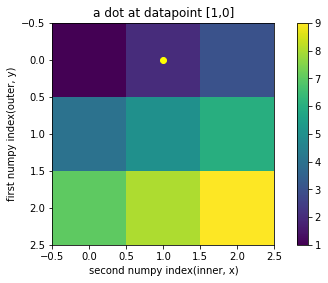

In [7]:
plt.figure()
plt.imshow(test_array)
plt.title("a dot at datapoint [1,0]")
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.scatter(1,0, color="yellow")
plt.show()

Hold on a second, this can't be right. We marked datapoint with the value 2, even though we expected 4!

For me perosonally, this is a major source of confusion.<br>
While python uses the $[y,x]$ indexation and `plt.imshow()` corrects for this,<br>
plotting points and vectors is still done using the sane $[x,y]$ notation

This means (and I wish I learned of this, when i started using python for microscopy),<br>
that **the positions of any points or vectors you plot, are transposed** in respect to the indices of your image-data.<br><br>

In other words, you have to **swap** the indices of the datapoints you wish to display, in order for matplotlib to display them correctly.<br><br>

Let's do it here, by writing `plt.scatter(0,1)` instead.

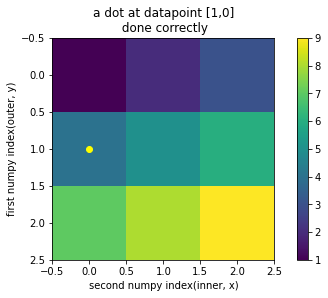

In [8]:
plt.figure()
plt.imshow(test_array)
plt.title("a dot at datapoint [1,0]\n done correctly")
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.scatter(0,1, color="yellow")
plt.show()

And voilá, the dot marks our datapoint with value 4.

Now, a fair warning. As I will explain again at the end of 1.) Vectors,<br>
<br>
You may not always want to swap your indices inside of your visualization function.<br> Be it `plt.scatter()` or something similar e.g `plt.quiver()`.<br>
<br>
You may need to transpose the data itself [ chapter 2.)b) ], if let's say, a different program plots your data, without you having control over it.

# 1.) Vectors

## a.) Vector orientation

let's say you'd like to draw a vector from (0,0) to (2,1) using the (x,y) convention.

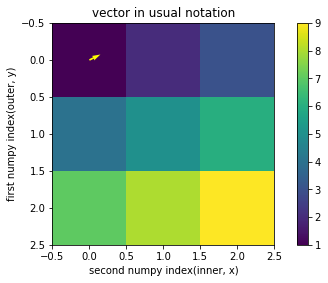

In [9]:
plt.figure()
plt.imshow(test_array)
plt.title("vector in usual notation")
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.quiver(0,0, 2,1, color="yellow")
plt.show()

Ignoring the vector's scale for now, we can see that unlike what we intended, the arrow follows the common textbook cartesian coordinates.

We can fix this by changing the image origin as seen in [5], but that the desired correspondence to nionswift would be gone.

Alternatively, we can invert the y component of the vector:

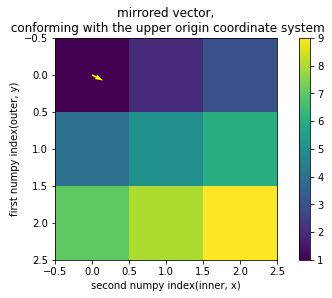

In [10]:
plt.figure()
plt.title("mirrored vector,\n conforming with the upper origin coordinate system")
plt.imshow(test_array)
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.quiver(0,0, 2,-1, color="yellow")
plt.show()

With this we have our first example of having to either adapt our thinking or **adjust our data** to use these conventions.

## b.) Vector translation

Let's start with the same vector as before:

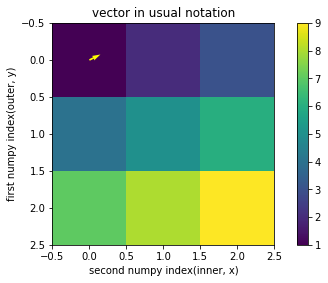

In [11]:
vector = [2,1]
position = [0,0]

plt.figure()
plt.title("vector in usual notation")
plt.imshow(test_array)
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.quiver(position[0], position[1], vector[0], vector[1], color="yellow")
plt.show()

what would happen if we were to translate the vector by itself?

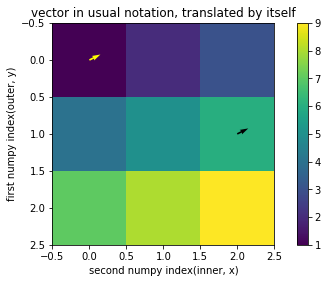

In [12]:
position2 = [0,0] #declaring a new position with 2 values
position2[0] = position[0] + vector[0]
position2[1] = position[1] + vector[1]

plt.figure()
plt.title("vector in usual notation, translated by itself")
plt.imshow(test_array)
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.quiver(position[0], position[1], vector[0], vector[1], color="yellow")
plt.quiver(position2[0], position2[1], vector[0], vector[1])
plt.show()

The vector was translated according to our upper origin coordinate system. But the vector itself is in lower origin convention.

What if we were adjust our vector with by inverting its y component, calling it ```vector_mirrored``` ?

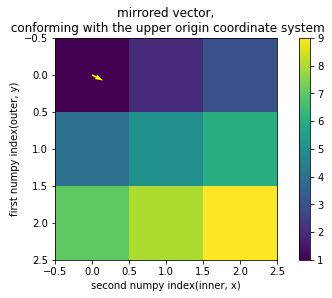

In [13]:
vector_mirrored = [2,-1]
position = [0,0]

plt.figure()
plt.title("mirrored vector,\n conforming with the upper origin coordinate system")
plt.imshow(test_array)
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.quiver(position[0], position[1], vector_mirrored[0], vector_mirrored[1], color="yellow")
plt.show()

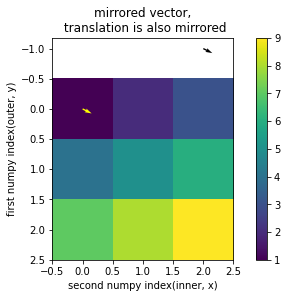

In [14]:
position3 = [0,0] #declaring a new position with 2 values
position3[0] = position[0] + vector_mirrored[0]
position3[1] = position[1] + vector_mirrored[1]

plt.figure()
plt.title("mirrored vector,\n translation is also mirrored")
plt.imshow(test_array)
plt.colorbar()
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.quiver(position[0], position[1], vector_mirrored[0], vector_mirrored[1], color="yellow")
plt.quiver(position3[0], position3[1], vector_mirrored[0], vector_mirrored[1])
plt.show()

We can see that the translation of the mirrored vector has changed accordingly and that it has left our data range.

To fix this, we will have to either `a)` only invert the y component right before displaying it

or `b)`using the mirrored vector and a subtraction instead of an addition for the second index, reverting the change for the caluclation

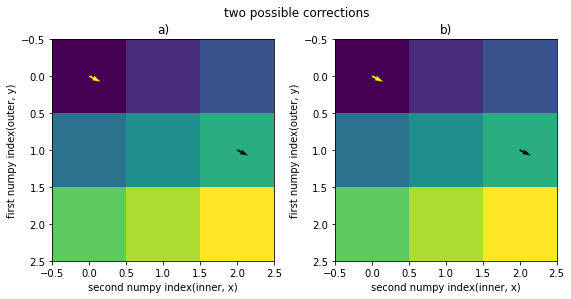

In [15]:
position = [0,0]
vector = [2,1]

fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("two possible corrections")
fig.tight_layout() #to stop axis labels from overlapping

#a) 
position2 = [0,0]
position2[0] = position[0] + vector[0]
position2[1] = position[1] + vector[1]
             
ax1.set_title("a)")
ax1.imshow(test_array)
ax1.set_ylabel("first numpy index(outer, y)")
ax1.set_xlabel("second numpy index(inner, x)")
ax1.quiver(position[0], position[1], vector[0], -vector[1], color="yellow")
ax1.quiver(position2[0], position2[1], vector[0], -vector[1])  #notice the inverted y component of the original vector here

#b)
vector_mirrored[0] = vector[0]
vector_mirrored[1] = vector[1] * -1 #negation of the vector's y component

position3 = [0,0] 
position3[0] = position[0] + vector_mirrored[0]
position3[1] = position[1] - vector_mirrored[1]  #notice the addtional change to a subtraction here

ax2.set_title("b)")
ax2.imshow(test_array)
ax2.set_ylabel("first numpy index(outer, y)")
ax2.set_xlabel("second numpy index(inner, x)")
ax2.quiver(position[0], position[1], vector_mirrored[0], vector_mirrored[1], color="yellow")
ax2.quiver(position3[0], position3[1], vector_mirrored[0], vector_mirrored[1]) 



The advantage of `a)` is unaltered data and operations.

The advantage of `b)` on the other hand, is unaltered visulization at the cost of altered data and operations.

Now one might ask, why would someone go through the trouble of **altering both data and the addition operator** for vectors?

Let's say you find yourself in a situation such as mine, in which you may be limited by an existing program, or existing technical conventions. (I have yet to confirm in my case.)

Then your preferred choice of action will most likely be, to adapt your formulas and algortithms, such that **the output is compatible with said programs and conventions**.

# 2.) Operations on Datasets

## a.) Calibration and Upper-left-corner data points

For this part, let's start with the same array as before, which we would like to use as our 2D dataset

But this time, let's also set the extent using `extent=[0,2,2,0]`, representing the nionswift convention

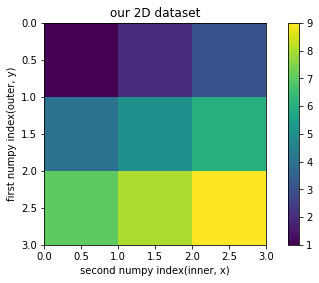

In [16]:
test_array = np.array(([1,2,3],[4,5,6],[7,8,9]))
test_array

plt.figure()
plt.title("our 2D dataset")
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.imshow(test_array, extent=[0,3,3,0], aspect=1)
plt.colorbar()
plt.show()

One major consequence of this convention, is that, as previously mentioned, the data points are now located in **upper left** corners of their respective pixels.

This is a dealbreaker for many image manipulating algorithms, because it **breaks the effective symmetry** of the dataset.

To alleviate this, we have to perform yet another adjustment to our data, to revert it to it's previous form

In microscopy, datasets should contain calibration parameters in the from of metadata. Let's first make a python dictionary containing the parameters we need to describe the graph we have:

In [17]:
metadata = { 'spatial_calibrations': [{'offset': 0.0, 'scale': 1.0, 'units': 'nm'},
  {'offset': 0.0, 'scale': 1.0, 'units': 'nm'}],
 'intensity_calibration': {'offset': 0.0, 'scale': 1.0, 'units': 'counts'}}

metadata

{'spatial_calibrations': [{'offset': 0.0, 'scale': 1.0, 'units': 'nm'},
  {'offset': 0.0, 'scale': 1.0, 'units': 'nm'}],
 'intensity_calibration': {'offset': 0.0, 'scale': 1.0, 'units': 'counts'}}

As an added bonus, I we now also have the "key" `'units'` with a value `'nm'` meaning nanometers.

To extract this data and store them into more useful valiables, we can use the keywords inside the dictionary as indices:

In [18]:
print(metadata['spatial_calibrations'])
print(metadata['spatial_calibrations'][0])
print(metadata['spatial_calibrations'][0]['scale'])

[{'offset': 0.0, 'scale': 1.0, 'units': 'nm'}, {'offset': 0.0, 'scale': 1.0, 'units': 'nm'}]
{'offset': 0.0, 'scale': 1.0, 'units': 'nm'}
1.0


Let's save them into appropriately named variables...<br><br> ...to be honest, I have no idea which one is x and which one is y, but let's just follow the $[y,x]$ indexation for now.<br><br> It won't matter for us while we are still working with "square-shaped" datasets

In [19]:
offset_y = metadata['spatial_calibrations'][0]['offset']
scale_y = metadata['spatial_calibrations'][0]['scale']
offset_x = metadata['spatial_calibrations'][1]['offset']
scale_x = metadata['spatial_calibrations'][1]['scale']

Now, to contextualise the parameters we extracted, let's use the calibration formula from [nionswift's documentation](https://nionswift.readthedocs.io/en/stable/data.html?highlight=Calibrations#calibrations):

$$
x' = x\cdot\text{scale} + \text{offset}
$$

$x$ in this formula corresponds to the indices of our data, and $x'$ to the physical coordinates. All of these are scalars.

The functions I've come across so far tend to use vectors or lists, consisting of all $x'$ along an axis.

To make our own we thus first need a list of indices $x$, we can apply the function to:

In [20]:
# length of one array axis used to make a list of indices with the same length
x = range(len(test_array[0]))
print("first row = ", test_array[0])
y = range(len(test_array[:,0]))
print("first column = ", test_array[:,0])
print("x = ", x)

first row =  [1 2 3]
first column =  [1 4 7]
x =  range(0, 3)


Well, unfortunately python doesn't print a range object as a list of 3 numbers, let's just hope it doesn't backfire on me later.

Also, remember how we noticed the $[y,x]$ indexation at the start? We now *try* to account for that by using `len()` of whole first row `[0]` for x and `len()` of the whole first column `[:,0]` for y<br>(although it won't matter much in our case with our data spanning a square)

We can now use these ranges/lists to draw the locations of our datapoints into our graph!<br>
<br>I will do it using two `for` loops.
<br> Written like this, they run once for each i and j equal to an element in x and y respectively.

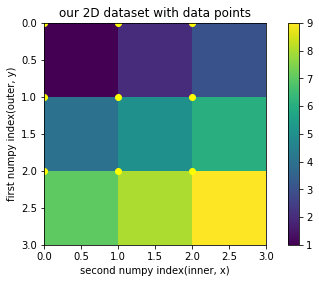

In [21]:
plt.figure()
plt.title("our 2D dataset with data points")
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.imshow(test_array, extent=[0,3,3,0], aspect=1)
plt.colorbar()

for i in x:
    for j in y:
        plt.scatter(i, j, color="yellow")

plt.show()

For comparison, this is what it looked like before we introduced the extent:

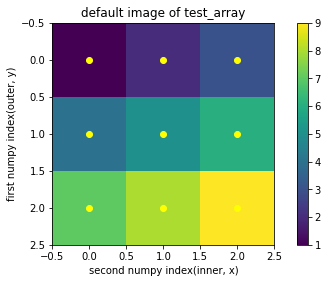

In [22]:
plt.figure()
plt.title("default image of test_array")
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.imshow(test_array, aspect=1)
plt.colorbar()

for i in x:
    for j in y:
        plt.scatter(i, j, color="yellow")

plt.show()

Now back to calibration. Let's apply the above formula to x and y:

In [23]:
def calibration_formula(index, scale, offset):
    return np.array(index) * scale + offset

Turns out, multiplying a `range()` with a scalar is not possible. I had to resort to converting the range into a numpy array object.


In [24]:
x_apostrophe = calibration_formula(x,scale_x,offset_x)
y_apostrophe = calibration_formula(y,scale_y,offset_y)
print("x_apostrophe = ",x_apostrophe)
print("y_apostrophe = ",y_apostrophe)

x_apostrophe =  [0. 1. 2.]
y_apostrophe =  [0. 1. 2.]


...At this point I realised, that our calibration vectors look exactly the same as our index lists.<br><br>Oh well, at least I've shown the process, and you can try calibrating the dataset using custom scales and offsets. Here is an (anti-)symmetric example:

In [25]:
x_custom = calibration_formula(x,2,-2)
y_custom = calibration_formula(y,2,-2)
print("x_custom = ",x_custom)
print("y_custom = ",y_custom)

x_custom =  [-2  0  2]
y_custom =  [-2  0  2]


## b.) Transposed datasets

Transposing a numpy 2D array swaps the indices of said array, effectively mirroring your dataset along a virtual x=y line.

This "index swap" is equivalent to swapping the x and y axes in your graph.

With numpy objects, transposing can easily be done by appending the `.T` method to your object:

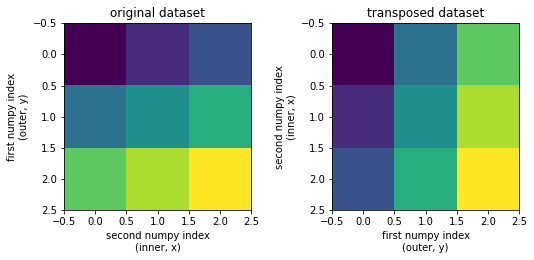

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.tight_layout(pad=4)   #to stop axis labels from overlapping

ax1.set_title("original dataset")
ax1.set_ylabel("first numpy index\n(outer, y)")
ax1.set_xlabel("second numpy index\n(inner, x)")
ax1.imshow(test_array, aspect=1)

ax2.set_title("transposed dataset")
ax2.set_xlabel("first numpy index\n(outer, y)")
ax2.set_ylabel("second numpy index\n(inner, x)")
ax2.imshow(test_array.T, aspect=1)

As we can see, swapping your indices by transposing has the disadvantage of mirroring your graphs and also your arrays:

In [27]:
print(test_array.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


Logically, thinking back to when we put a vector from a cartesian $[x,y]$ system, into a $[x,-y]$ system,<br> this transposed coordinate system also needs to be accounted for in both data and operands.

## c.) Vector fields

Let's make a function that depends only on the scalar value of a datapoint.<br><br> How about a function that returns a vector with components calculated from this value:

In [28]:
def weird_displacement(datapoint):
    x_comp = np.sin(datapoint*0.5*np.pi+.1)
    y_comp = np.cos(datapoint*0.5*np.pi+.1)
    return np.array((x_comp,y_comp))

Thanks to numpy, we can apply the function to either single datapoints, or to the whole 2D dataset:

I will also use `np.round(M,2)` from here on (M being the data we want to round), to round the output of the function to 2 decimal places.

In [29]:
print("vector from datapoint at [1,2]: ",
      test_array[1,2],
      " -> ",
      np.round( weird_displacement(test_array[1,2]) ,2))

print("\nvectors of all datapoints:\n",
      test_array,
      "\n\n |\n V \n\n",
      np.round( weird_displacement(test_array) ,2))


vector from datapoint at [1,2]:  6  ->  [-0.1 -1. ]

vectors of all datapoints:
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

 |
 V 

 [[[ 1.  -0.1 -1. ]
  [ 0.1  1.  -0.1]
  [-1.   0.1  1. ]]

 [[-0.1 -1.   0.1]
  [ 1.  -0.1 -1. ]
  [ 0.1  1.  -0.1]]]


Applying this function to our array results in a 3D array, consisting of two stacked matrices, each retaining the original 3x3 shape.

Let's also plot these vectors on top of our dataset:

Here we can also use our previously made calibration vectors to make a meshgrids of our datapoint coordinates.

our meshgrids X and Y: 
 [[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]] 

 [[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


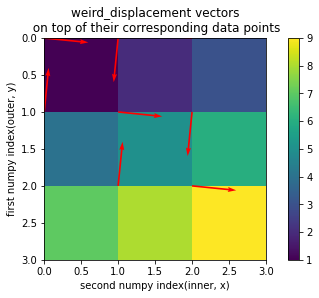

In [30]:
X, Y = np.meshgrid(x_apostrophe,y_apostrophe)
print("our meshgrids X and Y: \n",X,"\n\n",Y)
weird_array=weird_displacement(test_array)

plt.figure()
plt.title("weird_displacement vectors\n on top of their corresponding data points")
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.imshow(test_array, extent=[0,3,3,0], aspect=1)
plt.colorbar()

plt.quiver(X,Y,weird_array[0],weird_array[1], color="red", scale=5)

plt.show()

Unfortunately, we cannot see all of them like this, so we have to shift their positions by half a pixel in x and y.

I also choose `pivot="middle"` to center the vectors inside the pixels.

our meshgrids X and Y: 
 [[0.5 1.5 2.5]
 [0.5 1.5 2.5]
 [0.5 1.5 2.5]] 

 [[0.5 0.5 0.5]
 [1.5 1.5 1.5]
 [2.5 2.5 2.5]]


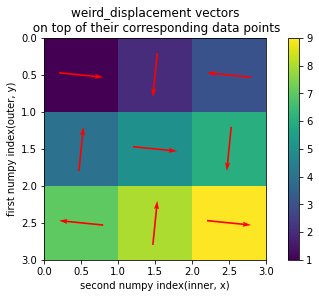

In [31]:
#Add 0.5 to the coordinate vectors this time
X_centered, Y_centered = np.meshgrid(x_apostrophe+0.5,y_apostrophe+0.5)
print("our meshgrids X and Y: \n",X_centered,"\n\n",Y_centered)
weird_array=weird_displacement(test_array)

plt.figure()
plt.title("weird_displacement vectors\n on top of their corresponding data points")
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.imshow(test_array, extent=[0,3,3,0], aspect=1)
plt.colorbar()

plt.quiver(X_centered,Y_centered,weird_array[0],weird_array[1], color="red", scale=5, pivot="middle")

plt.show()

By the way, four of the vectors are displayed incorrectly.<br> They are still in the $[x,y]$ system, whereas our dataset is displayed usding the $[x,-y]$ coordinate system.

Don't believe me?<br>
Alright, what's the sine and cosine of 3 pi? (hint: close to[29])<br>
And where does the vector (2,1) point? in y direction.<br>
Is that correct?

To fix them, let's try altering them as we did in 1.) b.), by multiplying the y-components by $-1$:

Here we use the `np.stack((M1,M2))` function to stack the two vector component matrices back together, after altering them individually.

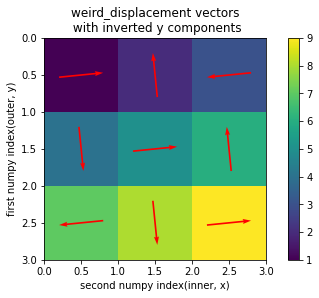

In [32]:
weird_array_mirrored = np.stack((weird_array[0],weird_array[1]*-1))

plt.figure()
plt.title("weird_displacement vectors\n with inverted y components")
plt.ylabel("first numpy index(outer, y)")
plt.xlabel("second numpy index(inner, x)")
plt.imshow(test_array, extent=[0,3,3,0], aspect=1)
plt.colorbar()

plt.quiver(X_centered,Y_centered,weird_array_mirrored[0],weird_array_mirrored[1], color="red", scale=5, pivot="middle")

plt.show()

Now they all look the way the original matrix `weird_array` in [29] would suggest.

## d.) Transposing vector fields

Alright, now let's say you wanted to transpose your dataset. What would happen to the vector field?

For this, let's transpose both the dataset and the **already mirrored** vector field component matrices:

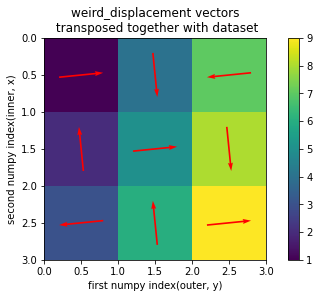

In [33]:
weird_array_mirrored_T = np.stack((weird_array_mirrored[0].T,weird_array_mirrored[1].T))

plt.figure()
plt.title("weird_displacement vectors\n transposed together with dataset")
plt.xlabel("first numpy index(outer, y)")
plt.ylabel("second numpy index(inner, x)")
plt.imshow(test_array.T, extent=[0,3,3,0], aspect=1)
plt.colorbar()

plt.quiver(X_centered,Y_centered,weird_array_mirrored_T[0],weird_array_mirrored_T[1], color="red", scale=5, pivot="middle")

plt.show()

The result is that all the off-center vectors have switched places, correctly following the transpose of the dataset.<br><br>It is also important to note, that the **vector lenghts and orientations are conserved** in respect to the transpose.<br>They don't change at all.

In [34]:
print("x and y components of our original vector field respectively: \n\n",
      np.round(weird_array,2),"\n")
print("x and y components of our vector field \nafter correcting and transposing: \n\n",
      np.round(weird_array_mirrored_T,2))

x and y components of our original vector field respectively: 

 [[[ 1.  -0.1 -1. ]
  [ 0.1  1.  -0.1]
  [-1.   0.1  1. ]]

 [[-0.1 -1.   0.1]
  [ 1.  -0.1 -1. ]
  [ 0.1  1.  -0.1]]] 

x and y components of our vector field 
after correcting and transposing: 

 [[[ 1.   0.1 -1. ]
  [-0.1  1.   0.1]
  [-1.  -0.1  1. ]]

 [[ 0.1 -1.  -0.1]
  [ 1.   0.1 -1. ]
  [-0.1  1.   0.1]]]


Taking another look at our final vector matrices, compared to our original vector field,<br> the matrix elements are mirrored along the matrix diagonal (transposed) and the y-components show a sign change on top of that.

Our vector field is now unfortunately, totally different from what it used to be.
<br><br>If we were to apply translations corresponding to these vectors again,<br>
we would have to undo all operations performed.

## e.) Mirroring vectors at $x=y$ <br>[DISCLAIMER: I am NOT confident in the accuracy of this section at this time]
aka. swapping vector components

Sometimes, you would like to mirror not just your dataset using by forming the transpose,
<br>but also vectors along the same $x=y$ diagonal.<br>
<br>
Doing this is similar to our previous vector component manipulations,<br>
but this time, we swap component indices inside the `np.stack()` function:

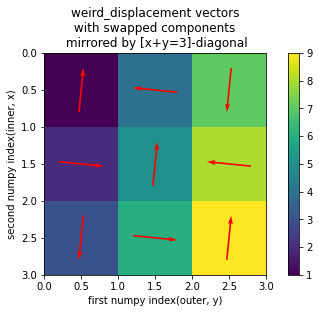

In [35]:
weird_array_m_T_s = np.stack((weird_array_mirrored_T[1],weird_array_mirrored_T[0]))

plt.figure()
plt.title("weird_displacement vectors\n with swapped components \n mirrored by [x+y=3]-diagonal")
plt.xlabel("first numpy index(outer, y)")
plt.ylabel("second numpy index(inner, x)")
plt.imshow(test_array.T, extent=[0,3,3,0], aspect=1)
plt.colorbar()

plt.quiver(X_centered,Y_centered,weird_array_m_T_s[0],weird_array_m_T_s[1], color="red", scale=5, pivot="middle")

plt.show()

The result is not what we expected. The vectors were mirrored along the wrong diagonal.<br>
<br>
Yet again, we have to apply what we learned from chapter 1.):<br>
To conform with our $[x,-y]$ graph, we have to revert the change we made in chapter 2.) c.),<br>
by additionally multiplying the y components with $-1$

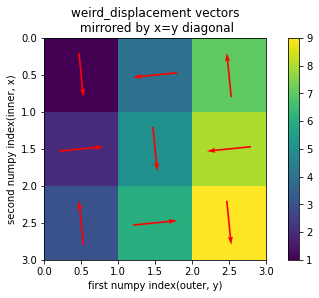

In [36]:
weird_array_M_T_s = np.stack((weird_array_m_T_s[0],weird_array_m_T_s[1] * -1 ))

plt.figure()
plt.title("weird_displacement vectors\n mirrored by x=y diagonal")
plt.xlabel("first numpy index(outer, y)")
plt.ylabel("second numpy index(inner, x)")
plt.imshow(test_array.T, extent=[0,3,3,0], aspect=1)
plt.colorbar()

plt.quiver(X_centered,Y_centered,weird_array_M_T_s[0],weird_array_M_T_s[1], color="red", scale=5, pivot="middle")

plt.show()

The result looks like a more intuitive and perhaps even more useful transpose of 2.) c.) than 2.) d.) was. <br>
<br>
Unlike 2.) d.) where we only mirrored the positions, here we mirrored the orientations on top of it.<br>
It now looks like you turned over transparent sheet of paper with our dataset and vectors printed on it.